#### In this project, we want to use build-in feature of music database to predict the familarity of a song. Since the data set size is 10,000 which is 10 times less than what the project required, we need to do the data augmentation and make it 100,000 data points. Since the familarity in this data set is a numeric value, if we want to make it as a classification value using supervise learning, we need to assign a label for each of them. For example, for all familarit larger than 0.5, we label it as 1, otherwise, 0. In this way, all the dataset will be split to two groups. The decision trees and random forest tree will take all the point as a tree node and build a decision tree based on entropy gain or other principle which forms a hyperplane in a high dimensional space to seperate the two group by minimizing the loss function (wrong classification.)

In [ ]:
!pip install imblearn

In [104]:
import music
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
data= music.get_music()
data

[{'artist': {'familiarity': 0.581793766,
   'hotttnesss': 0.401997543,
   'id': 'ARD7TVE1187B99BFB1',
   'latitude': 0.0,
   'location': 0,
   'longitude': 0.0,
   'name': 'Casual',
   'similar': 0.0,
   'terms': 'hip hop',
   'terms_freq': 1.0},
  'release': {'id': 300848, 'name': 0},
  'song': {'artist_mbtags': 0.0,
   'artist_mbtags_count': 0.0,
   'bars_confidence': 0.643,
   'bars_start': 0.58521,
   'beats_confidence': 0.834,
   'beats_start': 0.58521,
   'duration': 218.93179,
   'end_of_fade_in': 0.247,
   'hotttnesss': 0.60211999,
   'id': 'SOMZWCG12A8C13C480',
   'key': 1.0,
   'key_confidence': 0.736,
   'loudness': -11.197,
   'mode': 0,
   'mode_confidence': 0.636,
   'start_of_fade_out': 218.932,
   'tatums_confidence': 0.779,
   'tatums_start': 0.28519,
   'tempo': 92.198,
   'time_signature': 4.0,
   'time_signature_confidence': 0.778,
   'title': 0,
   'year': 0}},
 {'artist': {'familiarity': 0.630630038,
   'hotttnesss': 0.417499645,
   'id': 'ARMJAGH1187FB546F3',
   

In [31]:
len(data) # need data augmentation to 10 times

10000

In [32]:
data[0]['artist'] #checking the key


{'familiarity': 0.581793766,
 'hotttnesss': 0.401997543,
 'id': 'ARD7TVE1187B99BFB1',
 'latitude': 0.0,
 'location': 0,
 'longitude': 0.0,
 'name': 'Casual',
 'similar': 0.0,
 'terms': 'hip hop',
 'terms_freq': 1.0}

In [33]:
data[0]['song']

{'artist_mbtags': 0.0,
 'artist_mbtags_count': 0.0,
 'bars_confidence': 0.643,
 'bars_start': 0.58521,
 'beats_confidence': 0.834,
 'beats_start': 0.58521,
 'duration': 218.93179,
 'end_of_fade_in': 0.247,
 'hotttnesss': 0.60211999,
 'id': 'SOMZWCG12A8C13C480',
 'key': 1.0,
 'key_confidence': 0.736,
 'loudness': -11.197,
 'mode': 0,
 'mode_confidence': 0.636,
 'start_of_fade_out': 218.932,
 'tatums_confidence': 0.779,
 'tatums_start': 0.28519,
 'tempo': 92.198,
 'time_signature': 4.0,
 'time_signature_confidence': 0.778,
 'title': 0,
 'year': 0}

In [34]:
data[0]['release']

{'id': 300848, 'name': 0}

In [35]:
song_ID=[]
release_ID=[]
artist_ID=[]
for i in range(len(data)):
    #print(data[i]['release']['id'])
    song_ID.append(data[i]['song']['id'])
    release_ID.append(data[i]['release']['id'])
    artist_ID.append(data[i]['artist']['id'])

In [36]:
len(song_ID) 

10000

In [38]:
len(set(song_ID)) #all unique

10000

In [39]:
len(set(release_ID)) #not unique

8116

In [40]:
len(set(artist_ID))

3888

In [42]:
#for i in range(len(data)):
 #   print(data[i].keys())

In [43]:
art_key=list(data[0]['artist'].keys())
art_key[1]='artist_hotttnesss'   #rename the header since we have two hottness
art_key[2]='artist_id'
art_key[6]='artist_name'
art_key

['familiarity',
 'artist_hotttnesss',
 'artist_id',
 'latitude',
 'location',
 'longitude',
 'artist_name',
 'similar',
 'terms',
 'terms_freq']

In [44]:
song_key=list(data[0]['song'].keys())
song_key[8]='song_hotttnesss'
song_key[9]='song_id'
#song_key

In [45]:
rel_key=list(data[0]['release'].keys())
rel_key[0]='release_id'
rel_key[1]='release_name'
rel_key

['release_id', 'release_name']

In [46]:
headers=art_key+rel_key+song_key
headers

['familiarity',
 'artist_hotttnesss',
 'artist_id',
 'latitude',
 'location',
 'longitude',
 'artist_name',
 'similar',
 'terms',
 'terms_freq',
 'release_id',
 'release_name',
 'artist_mbtags',
 'artist_mbtags_count',
 'bars_confidence',
 'bars_start',
 'beats_confidence',
 'beats_start',
 'duration',
 'end_of_fade_in',
 'song_hotttnesss',
 'song_id',
 'key',
 'key_confidence',
 'loudness',
 'mode',
 'mode_confidence',
 'start_of_fade_out',
 'tatums_confidence',
 'tatums_start',
 'tempo',
 'time_signature',
 'time_signature_confidence',
 'title',
 'year']

In [47]:
len(set(headers))

35

In [48]:
data[0]['release'].keys()
list(data[0]['release'].values())

[300848, 0]

In [49]:
#art_val=list(data[0]['artist'].values())
#rel_val=list(data[0]['release'].values())
#song_val=list(data[0]['song'].values())
#all_val=art_val+rel_val+song_val
#len(all_val)

In [50]:
all_row=[]
for i in range(len(data)):
    art_val=list(data[i]['artist'].values())
    rel_val=list(data[i]['release'].values())
    song_val=list(data[i]['song'].values())
    each_row=art_val+rel_val+song_val
    all_row.append(each_row)
len(all_row)

10000

In [51]:
#all_row[:2]

In [52]:
filename = 'song.csv'

In [53]:
with open(filename, 'w', newline="") as file:
    csvwriter = csv.writer(file) 
    csvwriter.writerow(headers)
    
    csvwriter.writerows(all_row)

### data quanlity check and data clean

In [144]:
file_path = 'song.csv'
df = pd.read_csv(file_path)
print(df)


      familiarity  artist_hotttnesss           artist_id  latitude  location  \
0        0.581794           0.401998  ARD7TVE1187B99BFB1   0.00000         0   
1        0.630630           0.417500  ARMJAGH1187FB546F3  35.14968         0   
2        0.487357           0.343428  ARKRRTF1187B9984DA   0.00000         0   
3        0.630382           0.454231  AR7G5I41187FB4CE6C   0.00000         0   
4        0.651046           0.401724  ARXR32B1187FB57099   0.00000         0   
...           ...                ...                 ...       ...       ...   
9995     0.722571           0.499826  AR4C6V01187FB3BAF4  39.55792         0   
9996     0.511663           0.409779  AR9JLBU1187B9AAEC4 -33.96243         0   
9997     0.433508           0.289903  ARS1DCR1187B9A4A56   0.00000         0   
9998     0.334457           0.216829  ARAGMIV11F4C843F78   0.00000         0   
9999     0.609182           0.509243  ARYXOV81187B99831D   0.00000         0   

      longitude               artist_na

In [145]:
#remove zero-number column

columns_to_remove = ['location', 'similar', 'mode','title','latitude','longitude','artist_id','release_id','release_name','song_id','year']

# Removing multiple columns
df = df.drop(columns=columns_to_remove, axis=1)

# Display the DataFrame after removing columns
print(df)



      familiarity  artist_hotttnesss               artist_name  \
0        0.581794           0.401998                    Casual   
1        0.630630           0.417500              The Box Tops   
2        0.487357           0.343428          Sonora Santanera   
3        0.630382           0.454231                  Adam Ant   
4        0.651046           0.401724                       Gob   
...           ...                ...                       ...   
9995     0.722571           0.499826                 Moonspell   
9996     0.511663           0.409779            Danny Williams   
9997     0.433508           0.289903             Winston Reedy   
9998     0.334457           0.216829  Myrick "Freeze" Guillory   
9999     0.609182           0.509243       Seventh Day Slumber   

                   terms  terms_freq  artist_mbtags  artist_mbtags_count  \
0                hip hop    1.000000            0.0                  0.0   
1         blue-eyed soul    1.000000            0.0    

In [146]:
text_columns = []  # List to store columns with text data

# Iterate through columns and check data types
for column in df.columns:
    if df[column].dtype == object:  # Check if the data type is 'object' (usually represents text)
        text_columns.append(column)  # Add the column name to the list
        print(column)


artist_name
terms


In [147]:
#mapping terms and artist_name to a unique machine readable value and throw the old string column
label_encoder = LabelEncoder()
df['terms_encode'] = label_encoder.fit_transform(df['terms'])
df['artist_name_encode'] = label_encoder.fit_transform(df['artist_name'])
columns_to_remove=['terms','artist_name']
df = df.drop(columns=columns_to_remove, axis=1)
print(df)


      familiarity  artist_hotttnesss  terms_freq  artist_mbtags  \
0        0.581794           0.401998    1.000000            0.0   
1        0.630630           0.417500    1.000000            0.0   
2        0.487357           0.343428    1.000000            0.0   
3        0.630382           0.454231    0.988584            0.0   
4        0.651046           0.401724    0.887288            0.0   
...           ...                ...         ...            ...   
9995     0.722571           0.499826    0.999765            0.0   
9996     0.511663           0.409779    0.915417            0.0   
9997     0.433508           0.289903    0.960115            0.0   
9998     0.334457           0.216829    1.000000            0.0   
9999     0.609182           0.509243    0.926220            0.0   

      artist_mbtags_count  bars_confidence  bars_start  beats_confidence  \
0                     0.0            0.643     0.58521             0.834   
1                     1.0            0.007 

Text(0.5, 1.0, 'histogram for familarity (target)')

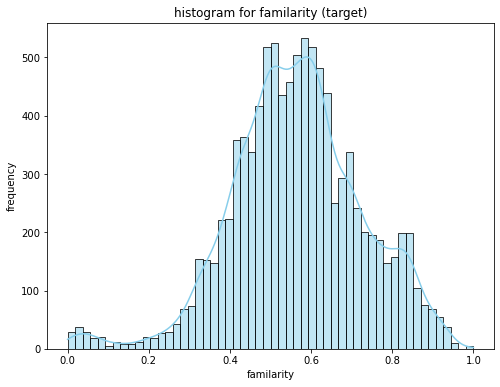

In [148]:
#check distribution of target 
plt.figure(figsize=(8,6))
sns.histplot(df['familiarity'],kde=True, color = 'skyblue')
plt.xlabel('familarity')
plt.ylabel('frequency')
plt.title('histogram for familarity (target)')

#### The distribution of familarity is near gaussian type. since the familarity equals to or above 0.5 and below 0.5 are half-half. So 0.5 will good boundary to do classification. And after data augmentation, we should expect same distribution.

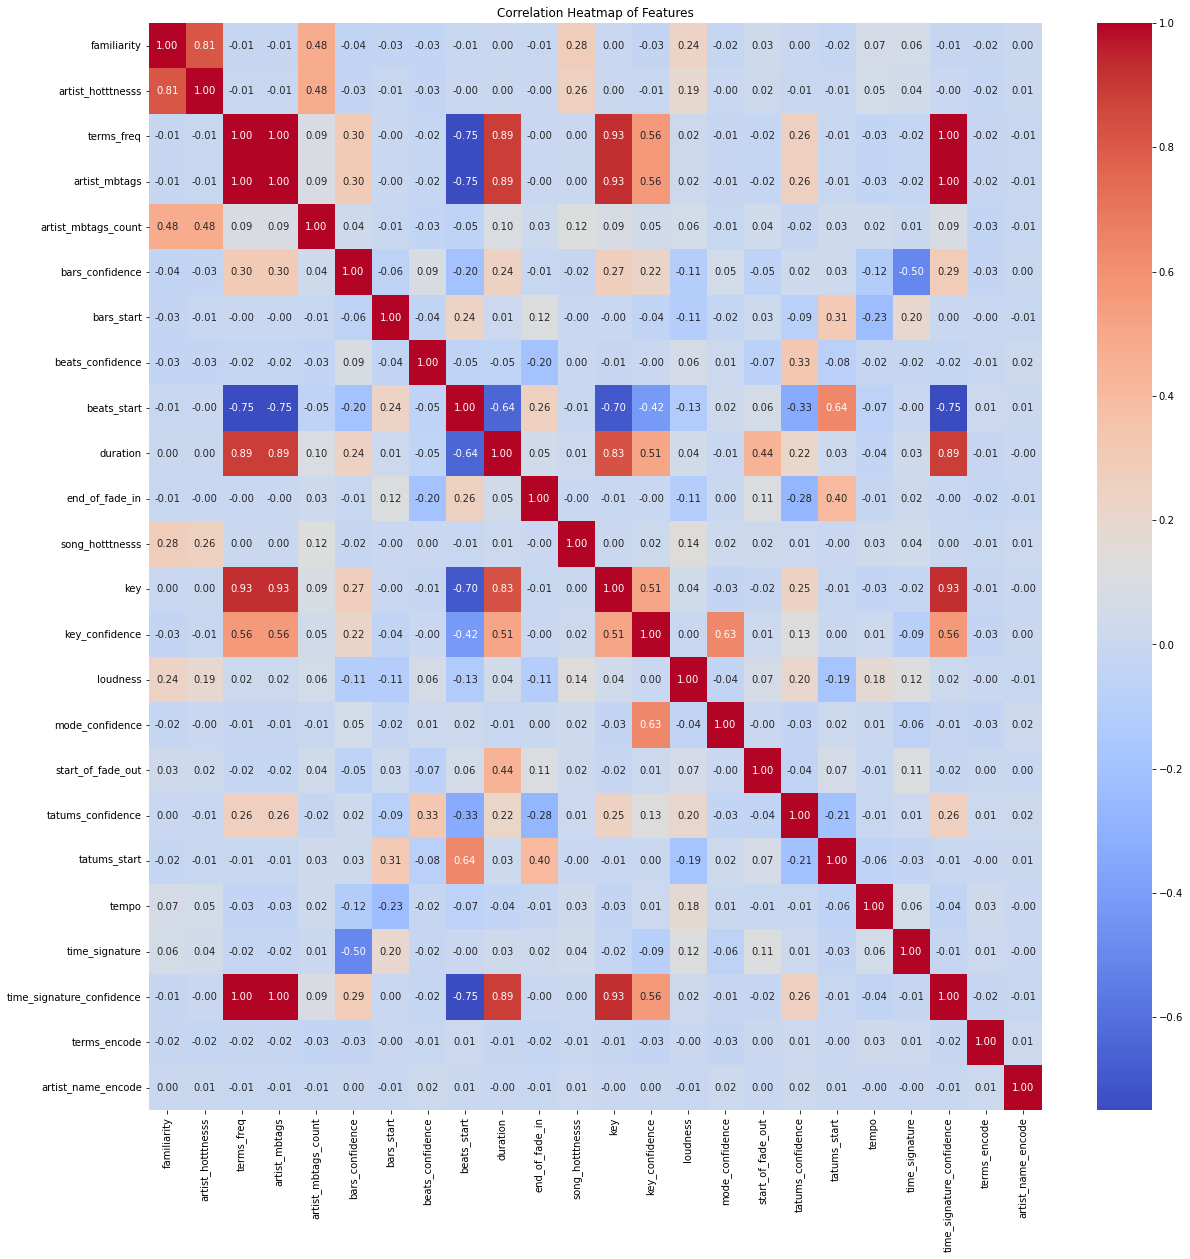

In [149]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

### data augmentation

In [150]:
first_row = df.head(1)
first_row
text_columns = []  # List to store columns with text data

# Iterate through columns and check data types
for column in df.columns:
    if df[column].dtype == object:  # Check if the data type is 'object' (usually represents text)
        text_columns.append(column)  # Add the column name to the list
        print(column)

In [154]:
# num_samples = 90000  # Replace this with your desired number of new samples

# # Generate new samples by adding noise to the original data's distribution
# noise = pd.DataFrame(np.random.normal(0.05, 0.02, size=(num_samples, len(df.columns))), columns=df.columns)
# new_samples = df.sample(n=num_samples, replace=True) + noise

# # Display the first few rows of the new samples before adding to the original data
# print(new_samples)

In [152]:
augmented_df = pd.concat([df] * 10, ignore_index=True)  # Duplicate DataFrame ten times
noise = np.random.normal(0.05, 0.02, size=(len(augmented_df), len(augmented_df.columns)))  # Generate Gaussian noise 
augmented_df = augmented_df + noise  # Add noise to the DataFrame

#bootstrap_sample = df.sample(n=len(df), replace=True) # boost-straping to create new samples by randomly sampling from original data set


augmented_df

,familiarity,artist_hotttnesss,terms_freq,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,...,loudness,mode_confidence,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,terms_encode,artist_name_encode
0,0.600651,0.442343,1.031049,0.059232,0.062847,0.691095,0.632860,0.932192,0.659772,218.990998,...,-11.125278,0.686090,218.949474,0.817270,0.346511,92.245373,4.033844,0.832219,215.050072,679.025446
1,0.725908,0.456589,1.025828,0.074418,1.050492,0.034558,0.767759,1.084202,0.238652,148.101488,...,-9.802496,0.490453,137.960187,1.044772,0.235366,121.337652,4.046649,0.416553,33.024719,3792.052676
2,0.545908,0.391552,1.044315,0.046878,0.060768,1.014249,0.774277,1.012859,0.772524,177.572307,...,-9.645388,0.592122,172.322694,0.544389,0.498769,100.106890,1.016986,0.039881,370.066993,3557.031180
3,0.678407,0.530115,1.020604,0.039900,1.032085,0.056386,1.337996,0.860012,0.852853,233.429367,...,-8.981379,0.762213,217.148899,0.640217,0.658173,119.318064,4.076001,0.037539,326.061189,72.057101
4,0.735036,0.482327,0.921578,0.042332,0.078964,0.239432,1.128550,0.931239,0.193461,209.655541,...,-4.451064,0.420826,198.742496,1.078062,0.210967,129.794771,4.034685,0.627979,324.063167,1565.074985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.788918,0.572605,1.079770,0.079420,1.038577,0.513534,0.896677,0.756904,0.500069,386.213051,...,-8.034770,0.570307,386.280026,0.276213,0.283100,140.209543,4.026277,0.152812,416.075755,2746.024550
99996,0.619517,0.473068,0.998986,0.047454,1.024116,0.166951,1.666364,0.988175,0.137625,168.077746,...,-14.500405,0.450662,163.530881,0.648578,0.156689,77.082508,3.066198,0.653403,20.045146,960.019090
99997,0.491242,0.338414,0.980183,0.030863,0.065247,0.009219,0.838883,1.065221,0.318363,193.771883,...,-12.010604,0.601476,186.096882,1.071223,0.321416,118.173016,4.056730,0.251187,259.086724,4322.060164
99998,0.389647,0.301233,1.047486,0.028033,0.030560,0.604781,0.308441,0.617125,0.285027,300.894389,...,-12.519309,0.559186,300.826238,0.451722,0.341374,137.709678,4.078924,0.097874,457.007789,2795.043379


Text(0.5, 1.0, 'histogram for familarity (target)')

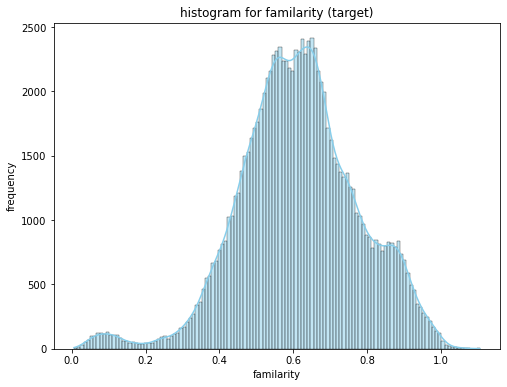

In [155]:
#check distribution of target 
plt.figure(figsize=(8,6))
sns.histplot(augmented_df['familiarity'],kde=True, color = 'skyblue')
plt.xlabel('familarity')
plt.ylabel('frequency')
plt.title('histogram for familarity (target)')

#### we will use this resampling fake data to do classification and forget about the original data. Since the distrubution after adding noise becomes wider, we need to renormalize the all the column. data normalization is an essential pre-processing step which involves the transformation of features in a common range so that greater numeric feature values cannot dominate the smaller numeric features values.

### familarity labeling (target labeling)

#### create a new column (target column) which correspoding to the familarity value. assign 0 or 1 accordingly

### classication using decision tree and random forest tree

https://www.linkedin.com/pulse/machine-learning-model-decision-tree-confusion-matrix-aparna-martin/


#### try to find if decision tree and reandom forest are implemented in one libabry such as sci-kit learn or lazy prediction kind of package, so we only need to change the input tree type, and it will directly training the model differently. The classification result will be display in a confusion matrix. Any other visualization of classificaction results are also very-welcomed such as below kind, so we can make this comparision more visually intuitive for people.

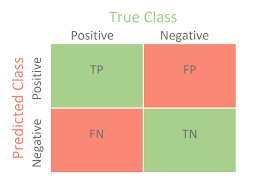

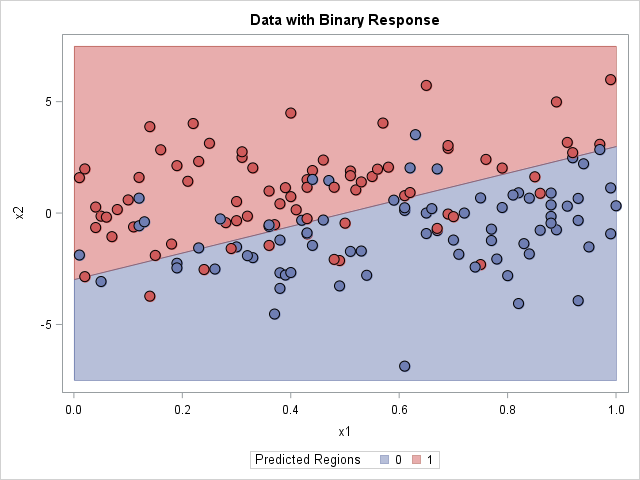